In [1]:
import numpy as np
import pickle as pk
import matplotlib.pyplot as plt
import time
%matplotlib inline
%load_ext autoreload
%autoreload 2


In [2]:
# import game,players,dominion,derivbot,combobot,cards,basic_ai,rl_agent

In [3]:
from game import *
from players import *
from dominion import *
from derivbot import *
from cards import *
from basic_ai import *
from rl_agent import *

# run games of random bot vs. smithy bot

In [25]:
st = time.time()
s = []
for i in xrange(1000):
    p1 = smithyComboBotFactory()
    vf = lambda x: 0
    p2 = RLPlayer(vf)
    s_this = run([p1,p2])
    s.append(s_this)
print time.time() - st

55.9562759399


'winrate of chapel bot over smithy bot is 0.0 %'

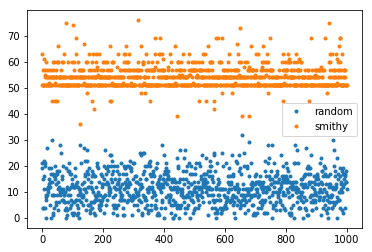

In [27]:
rl=[]
smithy=[]
for s_this in s:
    if isinstance(s_this[0][0], RLPlayer):
        rl.append(s_this[0][1])
        smithy.append(s_this[1][1])
    else:
        rl.append(s_this[1][1])
        smithy.append(s_this[0][1])

rl = np.array(rl)
smithy = np.array(smithy)
plt.plot(rl,'.')
plt.plot(smithy,'.')
plt.legend(['random','smithy'])
'winrate of chapel bot over smithy bot is {:.01f} %'.format(sum(rl-smithy>0)*100./len(rl))

# games of smithy vs. chapel bot

In [30]:
st = time.time()
s = []
for i in xrange(1000):
    p1 = smithyComboBotFactory()
    p2 = chapelComboBot
    s_this = run([p1,p2])
    s.append(s_this)
print time.time() - st

15.8718259335


'winrate of chapel bot over smithy bot is 25.2 %'

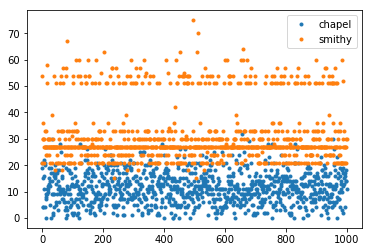

In [31]:
chapel=[]
smithy=[]
for s_this in s:
    if s_this[0][0].name == 'chapelComboBot':
        chapel.append(s_this[0][1])
        smithy.append(s_this[1][1])
    else:
        chapel.append(s_this[1][1])
        smithy.append(s_this[0][1])

chapel = np.array(chapel)
smithy = np.array(smithy)
plt.plot(rl,'.')
plt.plot(smithy,'.')
plt.legend(['chapel','smithy'])
'winrate of chapel bot over smithy bot is {:.01f} %'.format(sum(chapel-smithy>0)/1000.*100)

## random vs. chapel bot

In [33]:
st = time.time()
s = []
for i in xrange(100):
    p1 = chapelComboBot
    vf = lambda x: 0
    p2 = RLPlayer(vf)
    s_this = run([p1,p2])
    s.append(s_this)
print time.time() - st

8.80713677406


'winrate of random bot over chapel bot is 1.2 %'

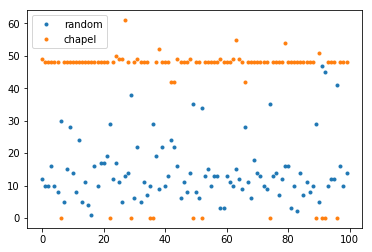

In [34]:
rl=[]
smithy=[]
for s_this in s:
    if isinstance(s_this[0][0], RLPlayer):
        rl.append(s_this[0][1])
        smithy.append(s_this[1][1])
    else:
        rl.append(s_this[1][1])
        smithy.append(s_this[0][1])

rl = np.array(rl)
smithy = np.array(smithy)
plt.plot(rl,'.')
plt.plot(smithy,'.')
plt.legend(['random','chapel'])
'winrate of random bot over chapel bot is {:.01f} %'.format(sum(rl-smithy>0)/1000.*100)

## run a test game

In [16]:
p1=smithyComboBotFactory()
p1.name = '1'
p2=smithyComboBotFactory()
g = Game.setup([p1, p2])

In [17]:
while not g.over():
    g = g.take_turn()

In [18]:
g.playerstates[0].player.name

'1'

In [77]:
p1=smithyComboBotFactory()
p2=smithyComboBotFactory()
s = run([p1, p2])

In [78]:
scores_to_data(s)

(array([[0, 8, 8, ..., 0, 0, 0],
        [0, 8, 8, ..., 0, 0, 0],
        [0, 8, 8, ..., 0, 0, 0],
        ...,
        [0, 8, 8, ..., 0, 0, 0],
        [0, 8, 8, ..., 0, 0, 0],
        [0, 8, 8, ..., 0, 0, 0]]),
 array([15, 16, 17, 18, 19, 21, 23, 18, 19, 21, 23, 25, 21, 23, 18, 19, 20,
        15, 16,  3,  4,  5,  6,  7,  8,  9, 10,  5,  6,  0,  0,  0,  0, -1,
        -2, -3, -4]))

# use simple fitting algorithm for value function

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [66]:
p1 = smithyComboBotFactory()
p2 = smithyComboBotFactory()
[X,Y] = record_game(5000,[p1,p2])

Playing game# 0
Playing game# 100
Playing game# 200
Playing game# 300
Playing game# 400
Playing game# 500
Playing game# 600
Playing game# 700
Playing game# 800
Playing game# 900
Playing game# 1000
Playing game# 1100
Playing game# 1200
Playing game# 1300
Playing game# 1400
Playing game# 1500
Playing game# 1600
Playing game# 1700
Playing game# 1800
Playing game# 1900
Playing game# 2000
Playing game# 2100
Playing game# 2200
Playing game# 2300
Playing game# 2400
Playing game# 2500
Playing game# 2600
Playing game# 2700
Playing game# 2800
Playing game# 2900
Playing game# 3000
Playing game# 3100
Playing game# 3200
Playing game# 3300
Playing game# 3400
Playing game# 3500
Playing game# 3600
Playing game# 3700
Playing game# 3800
Playing game# 3900
Playing game# 4000
Playing game# 4100
Playing game# 4200
Playing game# 4300
Playing game# 4400
Playing game# 4500
Playing game# 4600
Playing game# 4700
Playing game# 4800
Playing game# 4900
Took 56.981 seconds


In [71]:
reg_this = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=300)
reg_this.fit(X, Y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=300,
         random_state=None)

In [72]:
np.std(Y)

7.462169848909707

In [75]:
np.std(reg_this.predict(X))

2.9179620901036536

In [76]:
np.std(reg_this.predict(X)-Y)

6.714506674024179

In [64]:
nepoch = 50
Xlist=[]
Ylist=[]
reglist=[]
reg_this = regr_2
for i in range(nepoch):
    print('epoch number {:d}'.format(i))
    [xtmp, ytmp] = dominion.record_game(50, lambda x: reg_this.predict(x)[0])
    Xlist.append(xtmp)
    Ylist.append(ytmp)
    reg_this = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=50)
    reg_this.fit(xtmp, ytmp)
    reglist.append(reg_this)

epoch number 0
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 48.654 seconds
epoch number 1
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 46.211 seconds
epoch number 2
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 47.198 seconds
epoch number 3
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 95.950 seconds
epoch number 4
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 134.172 seconds
epoch number 5
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 69.596 seconds
epoch number 6
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 82.834 seconds
epoch number 7
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 103.316 seconds
epoch number 8
Playing game# 0
Playing game# 1

KeyboardInterrupt: 

In [69]:
np.concatenate(Xlist).shape

(524447, 111)

In [70]:
reg_this = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=50)
reg_this.fit(np.concatenate(Xlist), np.concatenate(Ylist))

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None)

In [71]:
st = time.time()
s = []
for i in xrange(50):
    if not i%10:
        print('game {:d}'.format(i))
    p1 = rl_agent.RLPlayer(lambda x: 0)
    p1.name = 'randombot'
    vf = lambda x: reg_this.predict(x)[0]
    p2 = rl_agent.RLPlayer(vf)
    s_this = dominion.run([p1,p2])
    s.append(s_this)
print time.time() - st

game 0
game 10
game 20
game 30
game 40
44.5003659725


In [72]:
rl=[]
ran=[]
for s_this in s:
    if s_this[0][0].name == 'randombot':
        ran.append(s_this[0][1])
        rl.append(s_this[1][1])
    else:
        ran.append(s_this[1][1])
        rl.append(s_this[0][1])

rl = np.array(rl)
ran = np.array(ran)

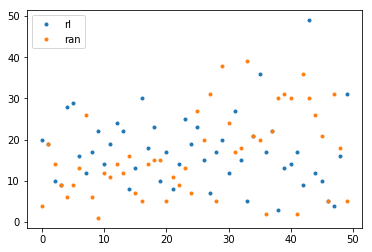

In [73]:
plt.plot(rl,'.')
plt.plot(ran,'.')
plt.legend(['rl','ran'])

In [74]:
'winrate of rl bot over random bot is {:.01f} %'.format(sum(rl-ran>0)/float(len(rl))*100)

'winrate of rl bot over random bot is 50.0 %'

In [55]:
nepoch = 10
thresh = 100000
X=np.concatenate(Xlist)
Y=np.concatenate(Ylist)
reg_this = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=50)
reg_this.fit(np.concatenate(Xlist), np.concatenate(Ylist))
for i in range(nepoch):
    print('epoch number {:d}'.format(i))
    [xtmp, ytmp] = dominion.record_game(50, lambda x: reg_this.predict(x)[0])
    X = np.concatenate([X, xtmp])
    Y = np.concatenate([Y, ytmp])
    reg_this = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=50)
    if len(Y)>thresh:
        reg_this.fit(X[-thresh:,:], Y[-thresh:])
    else:
        reg_this.fit(X, Y)
    reglist.append(reg_this)

epoch number 0
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 107.413 seconds
epoch number 1
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 100.908 seconds
epoch number 2
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 119.176 seconds
epoch number 3
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 111.700 seconds
epoch number 4
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 51.191 seconds
epoch number 5
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 105.833 seconds
epoch number 6
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 82.883 seconds
epoch number 7
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 88.979 seconds
epoch number 8
Playing game# 0
Playing game

### evaluate winrate against random bot

In [58]:
reg_this = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=50)
reg_this.fit(X, Y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None)

In [23]:
st = time.time()
s = []
for i in xrange(50):
    if not i%10:
        print('game {:d}'.format(i))
    p1 = RLPlayer(lambda x: 0)
    p1.name = 'randombot'
    vf = lambda x: regr_2.predict(x)[0]
    p2 = RLPlayer(vf)
    s_this = run([p1,p2])
    s.append(s_this)
print time.time() - st
rl=[]
ran=[]
for s_this in s:
    if s_this[0][0].name == 'randombot':
        ran.append(s_this[0][1])
        rl.append(s_this[1][1])
    else:
        ran.append(s_this[1][1])
        rl.append(s_this[0][1])
rl = np.array(rl)
ran = np.array(ran)
print('winrate of rl bot over random bot is {:.01f} %'.format(sum(rl-ran>0)/float(len(rl))*100))

game 0
game 10
game 20
game 30
game 40
40.3798801899
winrate of rl bot over random bot is 24.0 %


In [ ]:
nepoch = 10
thresh = 100000
reglist=[]
for i in range(nepoch):
    print('epoch number {:d}'.format(i))
    [xtmp, ytmp] = dominion.record_game(50, lambda x: reg_this.predict(x)[0])
    X = np.concatenate([X, xtmp])
    Y = np.concatenate([Y, ytmp])
    reg_this = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=50)
    if len(Y)>thresh:
        reg_this.fit(X[-thresh:,:], Y[-thresh])
    else:
        reg_this.fit(X[-thresh:,:], Y[-thresh])
    reglist.append(reg_this)